In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# for pretty plotting
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [64]:
rio = pd.read_csv('mobility_rio_final.csv')

In [65]:
rio.head()

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163
2,330060530000001,330060530,favela,b,SERRINHA,70,13,2,7.2,386.84,503
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464


In [66]:
# create new columns for mobility score factors
rio.columns

Index(['cod_sector_start', 'Cod_bairro', 'type', 'group', 'Nome_do_bairro',
       'travel_time_am', 'walk_time', 'mode_switches', 'price', 'avg_income',
       'tot_residents'],
      dtype='object')

In [67]:
# create % walk time
rio['walk_per'] = rio['walk_time']/rio['travel_time_am']

# create weekly cost (5 rides) 
rio['wkly_cost_am'] = rio['price']*5

# create % income for 5 rides
rio['income_per'] = rio['wkly_cost_am']/rio['avg_income']

# creating mobility score (raw)
rio['mobility_score'] = rio['travel_time_am']*rio['income_per']+rio['walk_per']


In [68]:
rio.head()

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents,walk_per,wkly_cost_am,income_per,mobility_score
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515,0.037736,75.0,0.140819,14.964510
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163,0.060606,39.5,0.042269,2.850393
2,330060530000001,330060530,favela,b,SERRINHA,70,13,2,7.2,386.84,503,0.185714,36.0,0.093062,6.700035
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024,0.037037,18.0,0.019906,1.111985
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464,0.132353,39.5,0.057115,4.016157


In [69]:
# finding averages for normalizing data within these neighborhood pairs
avg_walk_per = rio.walk_per.mean()
avg_travel_time_am = rio.travel_time_am.mean()
avg_income_per = rio.income_per.mean()

norm_key = avg_travel_time_am*avg_income_per+avg_walk_per

In [70]:
rio['mobility_score_norm'] = rio['mobility_score']/norm_key

In [74]:
mobility_by_city = rio [['Nome_do_bairro', 'mobility_score_norm', 'type', 'group']]

In [75]:
mobility_by_city

,Nome_do_bairro,mobility_score_norm,type,group
0,Cidade de Deus,4.605414,favela,a
1,Tanque,0.877225,formal,a
2,SERRINHA,2.061974,favela,b
3,Cascadura,0.342220,formal,b
4,Vidigal,1.235995,favela,c
5,Leblon,0.052539,formal,c
6,Rocinha,0.542543,favela,d
7,Gávea,0.185229,formal,d


Text(0.5,1,'Mobility Scores for Neighborhood Pairs')

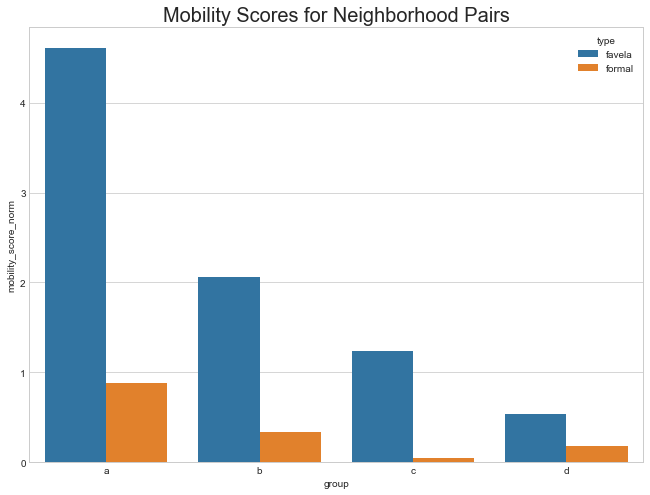

In [90]:
# source: https://seaborn.pydata.org/generated/seaborn.barplot.html
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(11,8))
ax = sns.barplot(x="group", y="mobility_score_norm", hue="type", data=mobility_by_city)

plt.title('Mobility Scores for Neighborhood Pairs' ,fontsize=20)

In [ ]:
# ratio pairs - biggest difference 
- why might this be? 